# Classifying Mobile Price Range Using KNN Algorithm

In this project, I will use the k-nearest neighbors algorithm to create a model to classify mobile price ranges based off the features of moblie devices. (https://www.kaggle.com/iabhishekofficial/mobile-price-classification)

### Data
This dataset contains the following features:

* 'battery_power' : total energy a battery can store in one time measured in mAh
* 'blue' : has bluetooth or not
* 'clock_speed' : speed at which microprocessor executes instructions
* 'dual_sim' : has dueal sim support or not
* 'fc' : front camera mega pixels 
* 'four_g' : has 4G or not
* 'int_memory' : internal memory in gigabytes
* 'm_dep' : mobile depth in cm
* 'mobile_wt' : weight of mobile phone
* 'n_cores' : number of cores of processor
* 'pc' : primary camera mega pixels
* 'px_height' : pixel resolution height
* 'px_width' : pixel resolution width
* 'ram' : random access memory in megabytes
* 'sc_h' : screen Height of mobile in cm
* 'sc_w' : screen Width of mobile in cm
* 'talk_time' : longest time that a single battery charge will last when you are
* 'three_g' : has 3G or not
* 'touch_screen' : has touch screen or not
* 'wifi' : has wifi or not
* 'price_range' : target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)


In [1]:
# import libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import dataset

df = pd.read_csv('train.csv')

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


### Exploratory Data Analysis

Let's dive into this dataset with some visualizations!

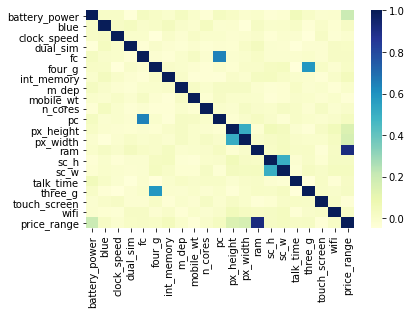

In [5]:
sns.heatmap(df.corr(), cmap="YlGnBu")

#### It seems like price range is highly correlated with ram size and weakly correlated with battery power, px_height, and px_width.
#### pc(primary camera mega pixels) and fc(front camera mega pixels) are highly correlated and so are 3g and 4g. 
#### Also, px_height and px_weight show somewhat strong correlation.

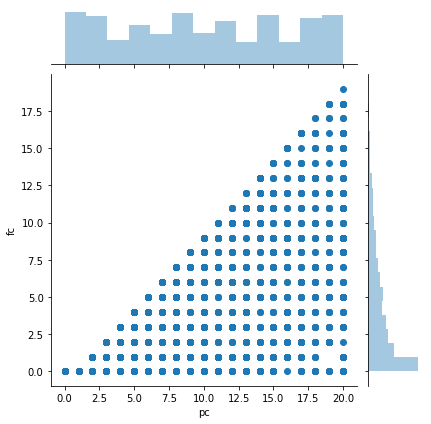

In [7]:
sns.jointplot(x='pc',y='fc',data=df)
import warnings
warnings.filterwarnings("ignore")

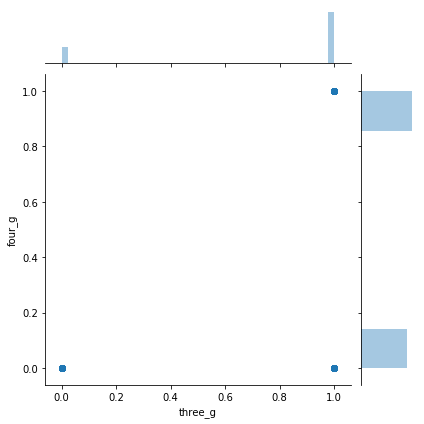

In [8]:
sns.jointplot(x='three_g',y='four_g',data=df)

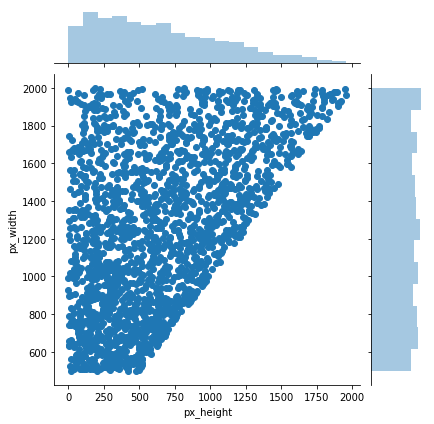

In [9]:
sns.jointplot(x='px_height',y='px_width',data=df)

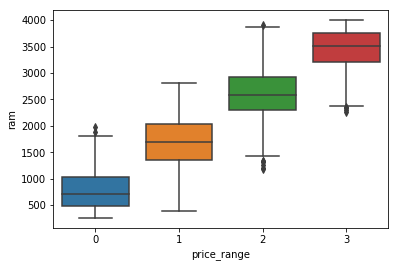

In [10]:
sns.boxplot(x='price_range',y='ram',data=df)

### Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [11]:
# import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(df.drop('price_range',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
scaled_features = scaler.transform(df.drop('price_range',axis=1))

In [15]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


#### Now, all variables are standardized! It is time to split our data into a training set and a testing set

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['price_range'],test_size=0.30, random_state=101)

### Choosing a Value of k

I am going to use the elbow method to pick a good value of K.

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

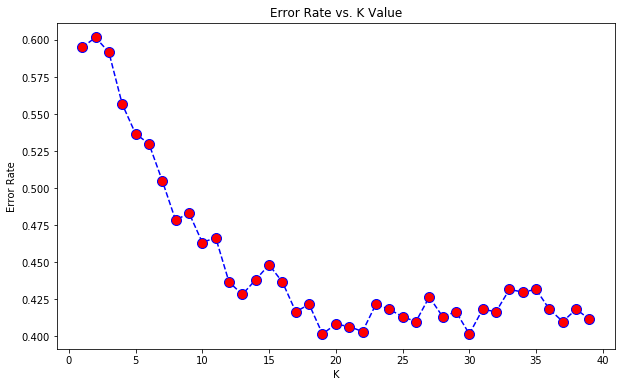

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### It seems like 19 or 22 would be a good K value. 

### Using KNN

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

# k = 1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred_1 = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred_1))
print('\n')
print(classification_report(y_test,pred_1))

WITH K=1


[[76 49 16  3]
 [37 46 43 15]
 [21 66 52 39]
 [ 2 27 39 69]]


              precision    recall  f1-score   support

           0       0.56      0.53      0.54       144
           1       0.24      0.33      0.28       141
           2       0.35      0.29      0.32       178
           3       0.55      0.50      0.52       137

   micro avg       0.41      0.41      0.41       600
   macro avg       0.42      0.41      0.42       600
weighted avg       0.42      0.41      0.41       600



In [22]:
# k = 19
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train,y_train)
pred_19 = knn.predict(X_test)

print('WITH K=19')
print('\n')
print(confusion_matrix(y_test,pred_19))
print('\n')
print(classification_report(y_test,pred_19))

WITH K=19


[[110  31   3   0]
 [ 41  77  20   3]
 [ 14  65  69  30]
 [  0  12  22 103]]


              precision    recall  f1-score   support

           0       0.67      0.76      0.71       144
           1       0.42      0.55      0.47       141
           2       0.61      0.39      0.47       178
           3       0.76      0.75      0.75       137

   micro avg       0.60      0.60      0.60       600
   macro avg       0.61      0.61      0.60       600
weighted avg       0.61      0.60      0.59       600



In [23]:
# k = 22
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train,y_train)
pred_22 = knn.predict(X_test)

print('WITH K=22')
print('\n')
print(confusion_matrix(y_test,pred_22))
print('\n')
print(classification_report(y_test,pred_22))

WITH K=22


[[103  38   3   0]
 [ 42  76  19   4]
 [  9  65  75  29]
 [  0  11  22 104]]


              precision    recall  f1-score   support

           0       0.67      0.72      0.69       144
           1       0.40      0.54      0.46       141
           2       0.63      0.42      0.51       178
           3       0.76      0.76      0.76       137

   micro avg       0.60      0.60      0.60       600
   macro avg       0.61      0.61      0.60       600
weighted avg       0.61      0.60      0.60       600



#### It seems like both k=19 and k=22 are good, but precisions are not that high.
#### So, I will only include variables that are correlated with price range.

In [24]:
# subsetting dataset

X = df_feat[['ram','battery_power','px_width','px_height']]
y = df['price_range']

In [25]:
# splitting test and train data again!

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=101)

In [26]:
# using the elbow method agian!

error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

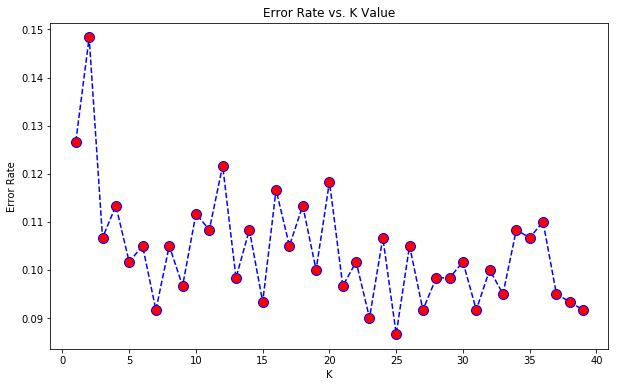

In [27]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### k=23 looks good!

In [28]:
# k = 1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred_1 = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred_1))
print('\n')
print(classification_report(y_test,pred_1))

WITH K=1


[[137   7   0   0]
 [  8 123  10   0]
 [  0  17 142  19]
 [  0   0  15 122]]


              precision    recall  f1-score   support

           0       0.94      0.95      0.95       144
           1       0.84      0.87      0.85       141
           2       0.85      0.80      0.82       178
           3       0.87      0.89      0.88       137

   micro avg       0.87      0.87      0.87       600
   macro avg       0.87      0.88      0.88       600
weighted avg       0.87      0.87      0.87       600



In [29]:
# k = 23
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)
pred_23 = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred_23))
print('\n')
print(classification_report(y_test,pred_23))

WITH K=23


[[142   2   0   0]
 [  6 130   5   0]
 [  0  22 153   3]
 [  0   0  16 121]]


              precision    recall  f1-score   support

           0       0.96      0.99      0.97       144
           1       0.84      0.92      0.88       141
           2       0.88      0.86      0.87       178
           3       0.98      0.88      0.93       137

   micro avg       0.91      0.91      0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600



#### precision is much higher than previous

### Predicting Price Range 

In [30]:
# import test dataset
test = pd.read_csv('test.csv')

In [31]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [32]:
# standardize the variables again
scaler_test = StandardScaler()

In [33]:
scaler_test.fit(test.drop('id', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [34]:
scaledtest_features = scaler_test.transform(test.drop('id', axis=1))

In [35]:
test_feat = pd.DataFrame(scaledtest_features,columns=df.columns[:-1])
test_feat.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.475451,0.968496,0.312601,0.966559,2.108676,-0.974329,-1.581269,-1.487247,1.535535,-0.580671,0.976026,-0.926990,0.391912,1.229373,0.001158,0.397363,-1.653355,-1.760216,1.0,-1.014099
1,-0.942782,0.968496,-1.255832,0.966559,-0.132927,1.026347,1.509303,1.006341,1.478120,0.293833,0.319433,0.274729,-0.871028,1.614643,-1.388231,-1.254383,-0.743418,0.568112,-1.0,-1.014099
2,1.292077,0.968496,1.519087,-1.034598,-0.805408,-0.974329,-0.367116,1.362567,1.334582,-0.580671,-0.993754,1.485693,0.287236,0.236313,1.158982,1.105254,-0.197456,-1.760216,1.0,0.986097
3,0.688249,-1.032529,-1.255832,0.966559,3.005317,1.026347,-0.477493,-0.062340,-1.249091,1.605590,1.632619,-0.767532,1.165604,1.612804,-0.461972,-1.254383,-0.743418,0.568112,1.0,-1.014099
4,0.429135,-1.032529,-0.169994,-1.034598,1.436195,1.026347,0.847037,-0.062340,-0.904602,0.731085,1.304323,0.281662,-0.977979,-0.336535,0.695852,0.633326,-0.743418,0.568112,-1.0,0.986097


In [36]:
# selecting variables that are used for the knn model

test_var = test_feat[['ram','battery_power','px_width','px_height']]

In [37]:
# prediction

pred = knn.predict(test_var)

In [38]:
pred_price_range = pd.DataFrame(pred, columns=['price_range'])
Id = pd.DataFrame(test['id'])

In [39]:
pred_price_range.head()

,price_range
0,3
1,3
2,2
3,3
4,1


In [40]:
Id.head()

,id
0,1
1,2
2,3
3,4
4,5


In [41]:
result = pd.concat([Id,pred_price_range], axis=1)
result.head()

,id,price_range
0,1,3
1,2,3
2,3,2
3,4,3
4,5,1
